# XOR #
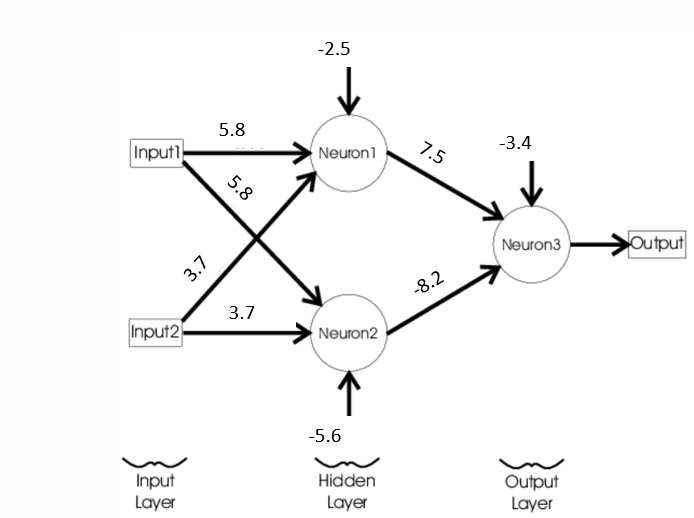
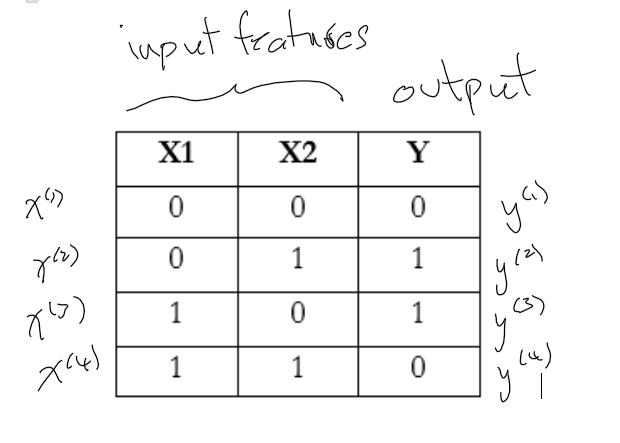

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
n0 = 2
n1 = 2
n2 = 1
m = 4
# Layer [1
w11 = np.array([[5.8], [5.8]])  # w[1]1
w12 = np.array([[3.7], [3.7]]) 
b11 = -2.5
b12 = -5.6

# Layer [2]
w21 = 7.5
w22 = -8.2
b21 = -3.4

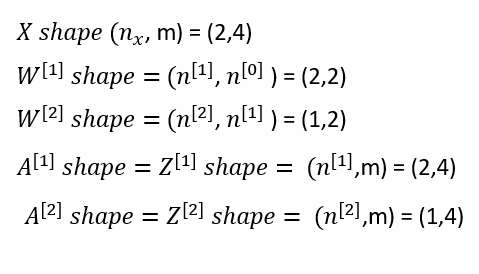

In [7]:
W1 = np.concatenate((w11.T, w12.T), axis=0)
b1 = np.array([[b11], [b12]])
W2 = np.array([[w21], [w22]]).T
b2 = b21
               

In [8]:
W1

array([[5.8, 5.8],
       [3.7, 3.7]])

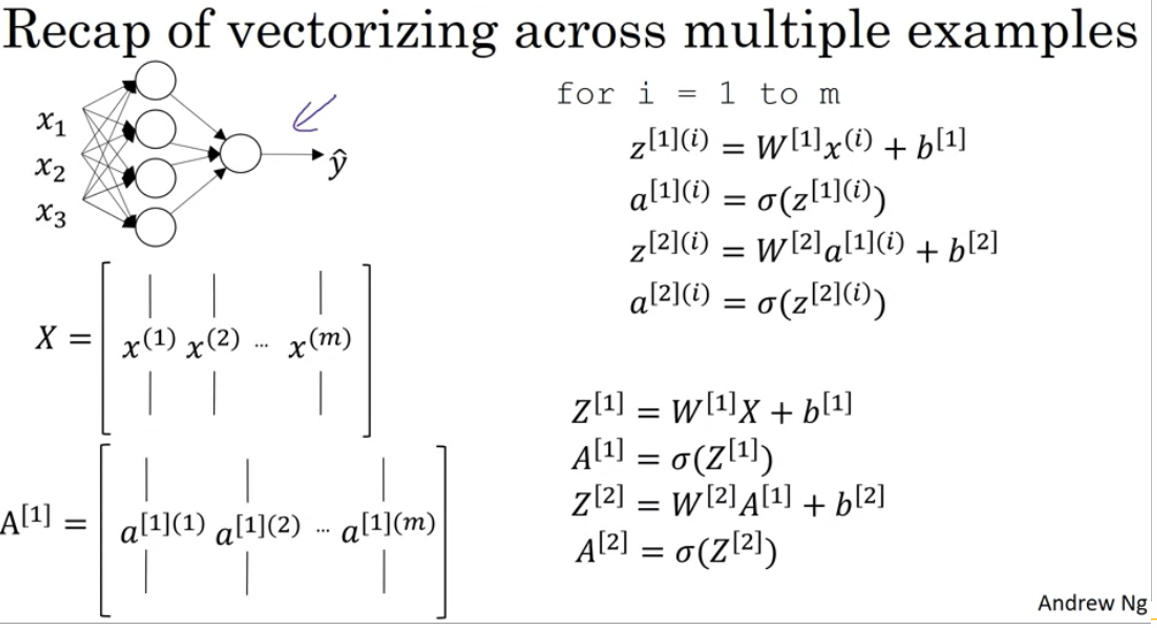

# Foward/Backward Propagation #
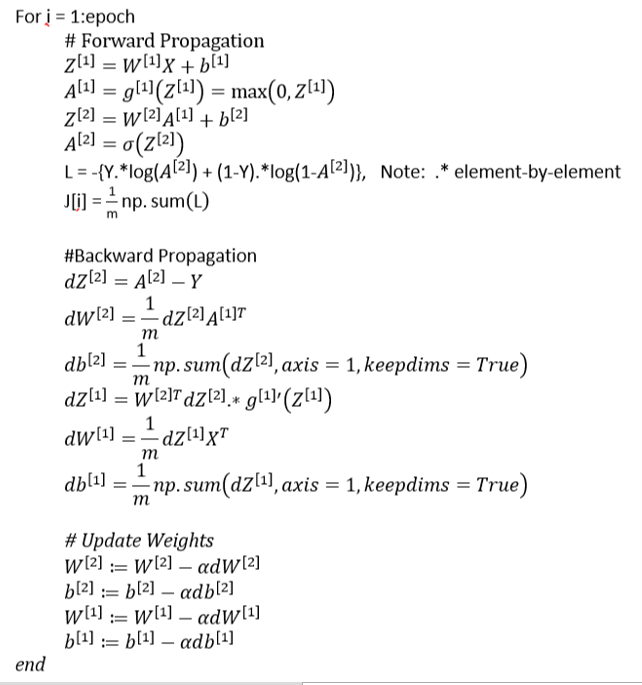

In [9]:
def Sigmoid(z):
    a = 1 / (1 + np.exp(-z))
    return a

In [10]:
def dSigmoid(x):
    s = Sigmoid(x)
    ds = s*(1-s)
    return ds

In [11]:
def dRelu(z):
    return np.where(z <= 0, 0, 1)

In [12]:
def Relu(z):
    return np.maximum(z, 0)

## Forward Propagation - Inference ##

In [13]:
# Construct X and Y
m=4
n0 = 2
n1 = 2
n2 = 1

x1 = np.array([[0], [0]]) # each sample
x2 = np.array([[0], [1]])
x3 = np.array([[1], [0]])
x4 = np.array([[1], [1]])
X = np.concatenate((x1, x2, x3, x4), axis=1) # shape (n0, m)
Y = np.array([0, 1, 1, 0]) #shape (1,m)
print(X)
print(Y)

[[0 0 1 1]
 [0 1 0 1]]
[0 1 1 0]


In [14]:
W1

array([[5.8, 5.8],
       [3.7, 3.7]])

In [15]:
W2

array([[ 7.5, -8.2]])

In [16]:
# Forward propagation with given wegihts
Z1 = np.dot(W1,X) + b1
A1 = Sigmoid(Z1)
Z2 = np.dot(W2,A1) + b2
A2 = Sigmoid(Z2)
print('Deterministic output is:', np.rint(A2))

Deterministic output is: [[0. 1. 1. 0.]]


In [17]:
A2

array([[0.05410145, 0.94082882, 0.94082882, 0.05032305]])

## Back Propagation ##

In [18]:
epoch = 3000
alpha = .4


W1 = np.random.randn(n1, n0)
b1 = np.random.randn(n1, 1) 
W2 = np.random.randn(n2, n1)
b2 = np.random.randn(n2, 1)

cost = np.zeros((epoch,1))
print(W1.shape, X.shape, W2.shape)

(2, 2) (2, 4) (1, 2)


Index i =  0
Cost = 
[0.70215176]
A2 = 
[[0.59330651 0.58499316 0.49891508 0.49208293]]
Index i =  500
Cost = 
[0.67850034]
A2 = 
[[0.49773517 0.57936466 0.44288461 0.48578017]]
Index i =  1000
Cost = 
[0.49072198]
A2 = 
[[0.31982296 0.88695378 0.4021476  0.42107785]]
Index i =  1500
Cost = 
[0.06848397]
A2 = 
[[0.07815202 0.9516888  0.92761348 0.06564945]]
Index i =  2000
Cost = 
[0.0295503]
A2 = 
[[0.03435618 0.97574636 0.97143631 0.02927181]]
Index i =  2500
Cost = 
[0.01852365]
A2 = 
[[0.02162914 0.98419152 0.98260732 0.018573  ]]


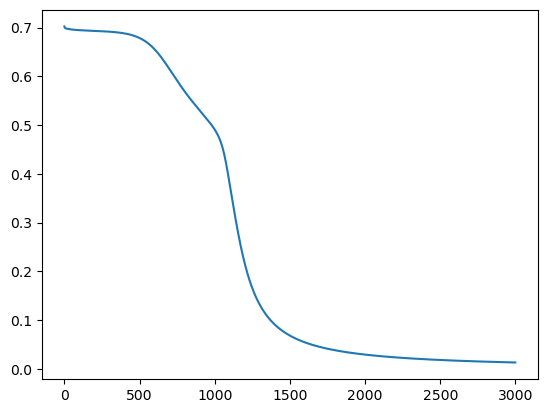

In [19]:
for i in range(epoch):
    # Forward prop
    Z1 = np.dot(W1,X) + b1
    A1 = Sigmoid(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = Sigmoid(Z2)
    loss= -(Y*np.log(A2)+(1-Y)*np.log(1-A2))
    cost[i] = (1/m)*np.sum(loss) 
    
    # Backward prop
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m
    dZ1 = np.dot(W2.T, dZ2)*dSigmoid(Z1)
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m
    
    # Update Weights
    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*db2
    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*db1
    
    # Verbose
    if i%500 == 0:
        print('Index i = ', i)
        print('Cost = ')
        print(cost[i])
        print('A2 = ')
        print(A2)
plt.plot(cost)

In [20]:
np.rint(A2)



array([[0., 1., 1., 0.]])

In [21]:
W1

array([[-6.65761281,  6.4583466 ],
       [ 5.68350399, -5.97779573]])

In [22]:
b1

array([[-3.57886943],
       [-3.12600077]])

## Keras ##

x = np.array([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])
y = np.array([0.,1.,1.,0.])

x

In [23]:
from keras.layers import Dense
from keras.models import Sequential
import keras

In [24]:
print(X.T.shape)
print(Y.shape)

(4, 2)
(4,)


In [31]:
model = Sequential()
model.add(Dense(units=10,activation='relu',input_dim=2))
model.add(Dense(units=1,activation='sigmoid'))

sgd=keras.optimizers.SGD(learning_rate=.6)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())
#print(model.get_weights())
history = model.fit(X.T,Y.T,epochs=100,batch_size=4,verbose=1)
#print(model.get_weights())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                30        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1/1 [==============================] - 1s 640ms/step - loss: 0.6670 - accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6551 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6469 - accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6357 - accuracy: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 14

1/1 [==============================] - 0s 94ms/step
Yhat rounded =  [[0. 1. 1. 0.]]


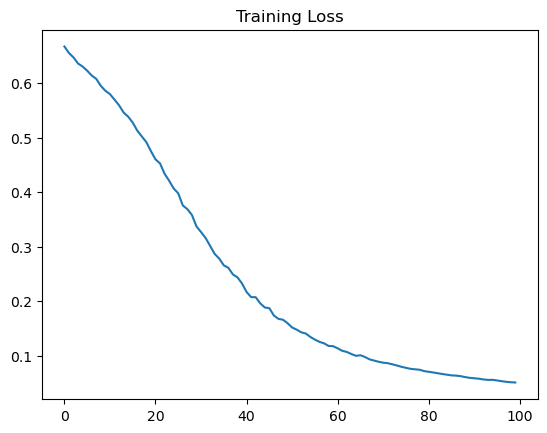

In [32]:
Yhat = model.predict(X.T)
print('Yhat rounded = ', np.rint(Yhat.T))
plt.plot(history.history['loss'])
plt.title('Training Loss');

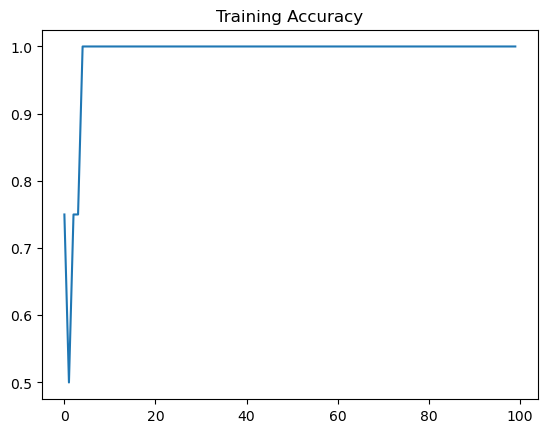

In [33]:
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy');